In [10]:
import pandas

In [2]:
type(pandas)

module

In [8]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [4]:
fahr_to_celsius?

In [6]:
data = pandas.read_csv("data/A1_mosquito_data.csv")

In [7]:
data.head()

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243


* since we have one row per year, let's set that to the index using .set_index()

In [8]:
data = data.set_index("year")

* let's use the fahr_to_celsius() function to convert our fahr temp to celsisus on the fly (not saved)

In [9]:
fahr_to_celsius(data["temperature"])

year
2001    26.666667
2002    29.444444
2003    30.000000
2004    30.555556
2005    23.333333
2006    23.888889
2007    26.666667
2008    29.444444
2009    23.333333
2010    23.333333
Name: temperature, dtype: float64

* in pandas one way to add a column is to assign our result to a new column using the bracket structure

In [10]:
data["temperature_C"] = fahr_to_celsius(data["temperature"])

In [11]:
data.head()

,temperature,rainfall,mosquitos,temperature_C
year,,,,
2001,80,157,150,26.666667
2002,85,252,217,29.444444
2003,86,154,153,30.000000
2004,87,159,158,30.555556
2005,74,292,243,23.333333


* we can now do some graphing

In [14]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [15]:
plt.plot?

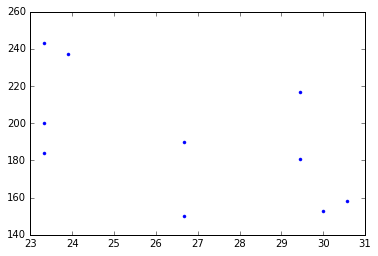

In [16]:
plt.plot(data["temperature_C"], data["mosquitos"], ".")
plt.savefig("A1_mosquito_data_mosquitos_vs_tempC.png")

In [17]:
!ls *png

A1_mosquito_data_mosquitos_vs_tempC.png


In [2]:
!ls *csv

A1_mosquito_data.csv   A2_mosquito_data_C.csv B1_mosquito_data.csv
A2_mosquito_data.csv   A3_mosquito_data.csv   B2_mosquito_data.csv


* let's start thinking about building a function. 
* we can do better on the file name of the png
* we want it associated with the file it comes from

In [20]:
a = "A2_mosquito_data.csv" #name of file we are plotting

* use the subset to grab 'A2_mosquito_data.' and add 'png' to it.

In [22]:
a[0:-3]  + "png"

'A2_mosquito_data.png'

In [24]:
a[0:-4] + "_mosquitos_vs_tempC.png"

'A2_mosquito_data_mosquitos_vs_tempC.png'

* we can use replace() to replace substring matches

In [25]:
a.replace(".csv", ".png")

'A2_mosquito_data.png'

### Let's take all the above and make a function.

Function does: 

1. load data
2. convert celsius
3. create the plot
4. save the plot to file

In [12]:
def create_mosquitos_vs_tempC_plot(filename):
    # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print("Saving", filename_png)
    return filename_png

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


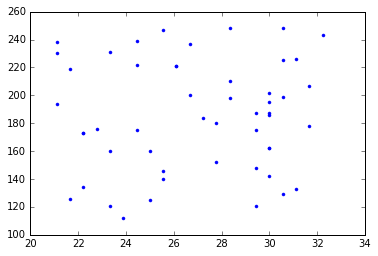

In [15]:
name_of_png = create_mosquitos_vs_tempC_plot("A2_mosquito_data.csv")

In [16]:
print(name_of_png)
!ls data/

A2_mosquito_data_mosquitos_vs_tempC.png
A1_mosquito_data.csv                    B1_mosquito_data.csv
A2_mosquito_data.csv                    B1_mosquito_data_mosquitos_vs_tempC.png
A2_mosquito_data_mosquitos_vs_tempC.png B2_mosquito_data.csv
A3_mosquito_data.csv                    decision_tree_example.url


Loading B1_mosquito_data.csv
Plotting B1_mosquito_data.csv
Saving B1_mosquito_data_mosquitos_vs_tempC.png


'B1_mosquito_data_mosquitos_vs_tempC.png'

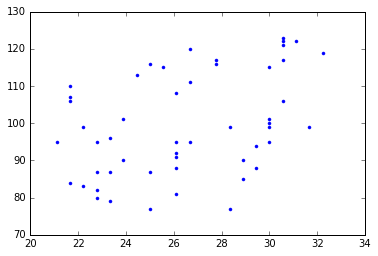

In [17]:
create_mosquitos_vs_tempC_plot("B1_mosquito_data.csv")

In [19]:
!ls *png

A1_mosquito_data_mosquitos_vs_tempC.png B1_mosquito_data_mosquitos_vs_tempC.png
A2_mosquito_data_mosquitos_vs_tempC.png


* let's alter the return statement to return the data 
* then we can write it out

In [25]:
def create_mosquitos_vs_tempC_plot(filename):
    # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print("Saving", filename_png)
    return mosquitos_data

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


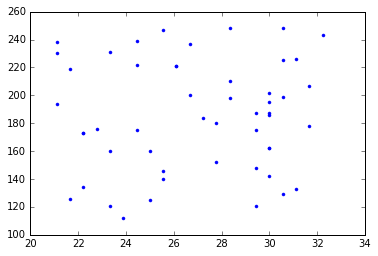

In [26]:
mosquito_data_A2 = create_mosquitos_vs_tempC_plot("A2_mosquito_data.csv")

In [27]:
mosquito_data_A2.to_csv("A2_mosquito_data_C.csv")

In [30]:
mosquito_data_A2.head(6)

,year,temperature,rainfall,mosquitos,temperature_C
0,1960,82,200,180,27.777778
1,1961,70,227,194,21.111111
2,1962,89,231,207,31.666667
3,1963,74,114,121,23.333333
4,1964,78,147,140,25.555556
5,1965,85,151,148,29.444444


In [29]:
!head A2_mosquito_data_C.csv

,year,temperature,rainfall,mosquitos,temperature_C
0,1960,82,200,180,27.77777777777778
1,1961,70,227,194,21.11111111111111
2,1962,89,231,207,31.666666666666668
3,1963,74,114,121,23.333333333333332
4,1964,78,147,140,25.555555555555557
5,1965,85,151,148,29.444444444444443
6,1966,86,172,162,30.0
7,1967,75,106,112,23.88888888888889
8,1968,70,276,230,21.11111111111111


In [31]:
mosquito_data_A2.to_csv("A2_mosquito_data_C.csv", index=False)

In [32]:
!head A2_mosquito_data_C.csv

year,temperature,rainfall,mosquitos,temperature_C
1960,82,200,180,27.77777777777778
1961,70,227,194,21.11111111111111
1962,89,231,207,31.666666666666668
1963,74,114,121,23.333333333333332
1964,78,147,140,25.555555555555557
1965,85,151,148,29.444444444444443
1966,86,172,162,30.0
1967,75,106,112,23.88888888888889
1968,70,276,230,21.11111111111111


### Let's make a python module!

* What's a [python module](http://programmers.stackexchange.com/questions/111871/module-vs-package)??
* Python module is simply a Python source file, which can expose classes, functions and global variables
* It's a python file .py with functions, etc.
* Let's take our existing functions and make a module (a file).

In [43]:
!pwd

/Users/jtdennis/Desktop/python-pandas


### Open up text editor:

1. On mac, use nano from command line (navigate to desktop folder containing your notebook and data)
2. On windows, use notepad.

import pandas
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

def create_mosquitos_vs_tempC_plot(filename):
    """Create a png plot of mosquitos vs temp C

    Parameters
    ----------
    filename : string
        name of csv data file
    Returns
    -------
    mosquito_data : DataFrame
        Table with temp C column
    """
    # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print("Saving", filename_png)
    return mosquitos_data

In [35]:
!cat analyze_mosquitos.py

import pandas
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

def create_mosquitos_vs_tempC_plot(filename):
    '''Create a png plot of mosquitos vs temp C

    Parameters
    ----------
    filename : string
        name of csv data file
    Returns
    -------
    mosquito_data : DataFrame
        Table with temp C column
    '''
    # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print("Saving", f